In [33]:
## I have data in csv files. I will write a dataloader to read data in a window fashion for training a model.
## Each csv file contains time series data with multiple features. Time is of 1 minute

In [34]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import seaborn as sns

DATA_FOLDER = '/mnt/ML_Codes/controls_challenge/data'
FILES = os.listdir(DATA_FOLDER)


In [35]:
def plot_data(file_path):
    # Load the dataset
    df = pd.read_csv(file_path)

    # 1. Temporal Dynamics Visualization
    # This helps you understand how variables change over time and interact
    sns.set_theme(style="whitegrid")
    fig, axes = plt.subplots(4, 1, figsize=(8, 10), sharex=True)

    # Plot Velocity (vEgo)
    sns.lineplot(ax=axes[0], x=df['t'], y=df['vEgo'], color='blue', linewidth=2)
    axes[0].set_ylabel('Velocity (m/s)', fontsize=12)
    axes[0].set_title('Vehicle State & Dynamics over Time', fontsize=16, weight='bold')
    axes[0].legend(['vEgo'], loc='upper right')

    # Plot Acceleration (aEgo)
    sns.lineplot(ax=axes[1], x=df['t'], y=df['aEgo'], color='orange', linewidth=2)
    axes[1].set_ylabel('Accel (m/s²)', fontsize=12)
    axes[1].legend(['aEgo'], loc='upper right')

    # Plot Road Roll (Disturbance)
    sns.lineplot(ax=axes[2], x=df['t'], y=df['roll'], color='green', linewidth=2)
    axes[2].set_ylabel('Road Roll (rad)', fontsize=12)
    axes[2].legend(['Road Roll'], loc='upper right')
    axes[2].set_title('Environmental Disturbance (Road Roll)', fontsize=12)

    # Plot Control vs Target (Dual Axis)
    # We plot SteerCommand vs TargetLateralAcceleration to see how the car reacts
    ax4 = axes[3]
    sns.lineplot(ax=ax4, x=df['t'], y=df['targetLateralAcceleration'], color='red', label='Target Lat Accel', linewidth=2.5)
    ax4.set_ylabel('Target Lat Accel (m/s²)', color='red', fontsize=12)
    ax4.tick_params(axis='y', labelcolor='red')

    ax4_twin = ax4.twinx()
    sns.lineplot(ax=ax4_twin, x=df['t'], y=df['steerCommand'], color='black', alpha=0.6, linestyle='--', label='Steer Command')
    ax4_twin.set_ylabel('Steer Command (unitless)', color='black', fontsize=12)
    ax4_twin.tick_params(axis='y', labelcolor='black')
    ax4_twin.grid(False) # Turn off grid for secondary axis to reduce clutter

    # Combine legends manually for the dual axis plot
    lines, labels = ax4.get_legend_handles_labels()
    lines2, labels2 = ax4_twin.get_legend_handles_labels()
    ax4.legend(lines + lines2, labels + labels2, loc='upper right')

    axes[3].set_xlabel('Time (s)', fontsize=14)
    plt.tight_layout()
    plt.show()

    # ---------------------------------------------------------

    # 2. Correlation Analysis
    # This helps determine which inputs are most predictive of the target/action
    plt.figure(figsize=(8, 6))
    corr_matrix = df[['vEgo', 'aEgo', 'roll', 'targetLateralAcceleration', 'steerCommand']].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Feature Correlation Matrix', fontsize=16, weight='bold')
    plt.show()

    # ---------------------------------------------------------

    # 3. Action-Target Relationship (Scatter)
    # This reveals the "Inverse Dynamics" - roughly what steer command produces what acceleration
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['targetLateralAcceleration'], y=df['steerCommand'], hue=df['vEgo'], palette='viridis', alpha=0.7)
    plt.title('Steer Command vs. Target Lateral Acceleration\n(Colored by Velocity)', fontsize=16)
    plt.xlabel('Target Lateral Acceleration (m/s²)')
    plt.ylabel('Steer Command')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    # ---------------------------------------------------------

    # 4. Distribution Analysis (Histograms)
    # Important for RL Normalization: Check the range and spread of your data
    fig, axes = plt.subplots(1, 3, figsize=(14, 4))

    sns.histplot(df['vEgo'], kde=True, ax=axes[0], color='blue')
    axes[0].set_title('Velocity Distribution (vEgo)')

    sns.histplot(df['targetLateralAcceleration'], kde=True, ax=axes[1], color='red')
    axes[1].set_title('Target LatAccel Distribution')

    sns.histplot(df['steerCommand'], kde=True, ax=axes[2], color='black')
    axes[2].set_title('Steer Command Distribution')

    plt.tight_layout()
    plt.show()

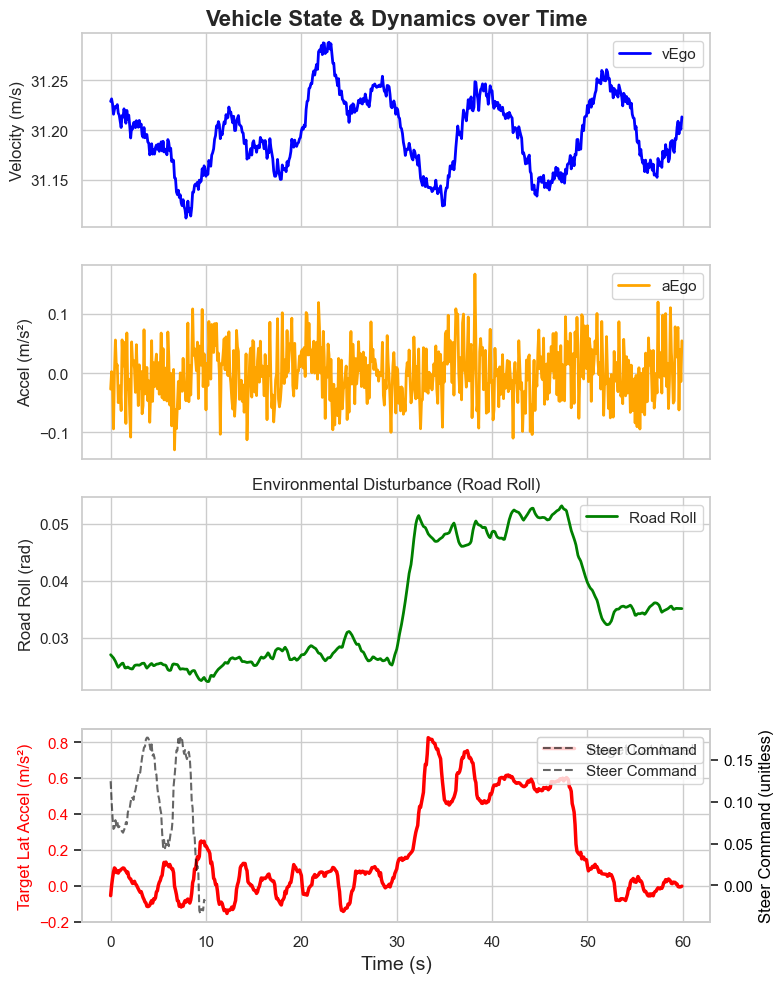

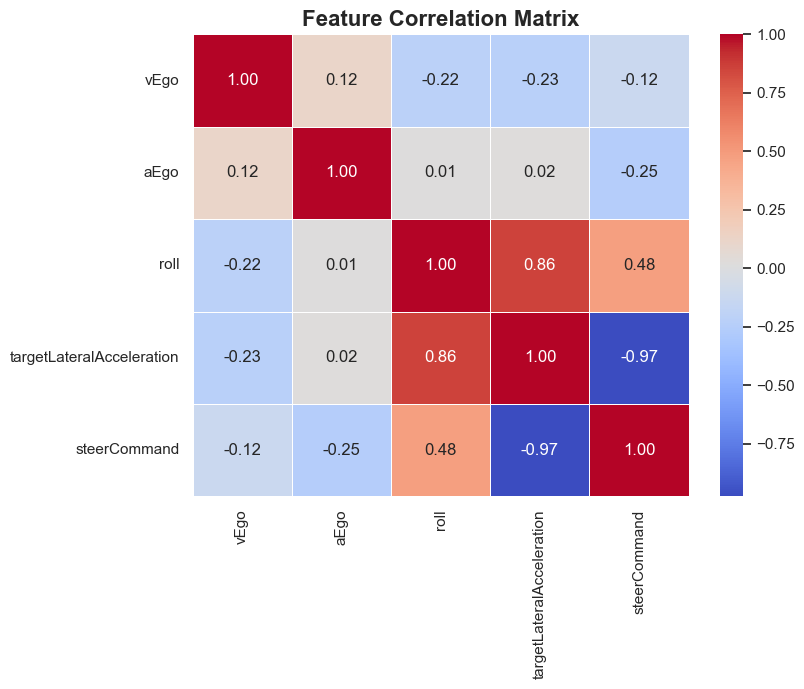

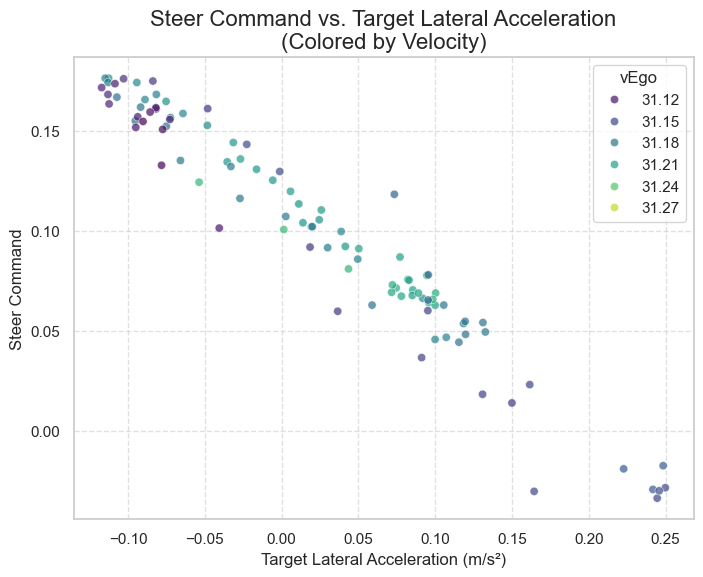

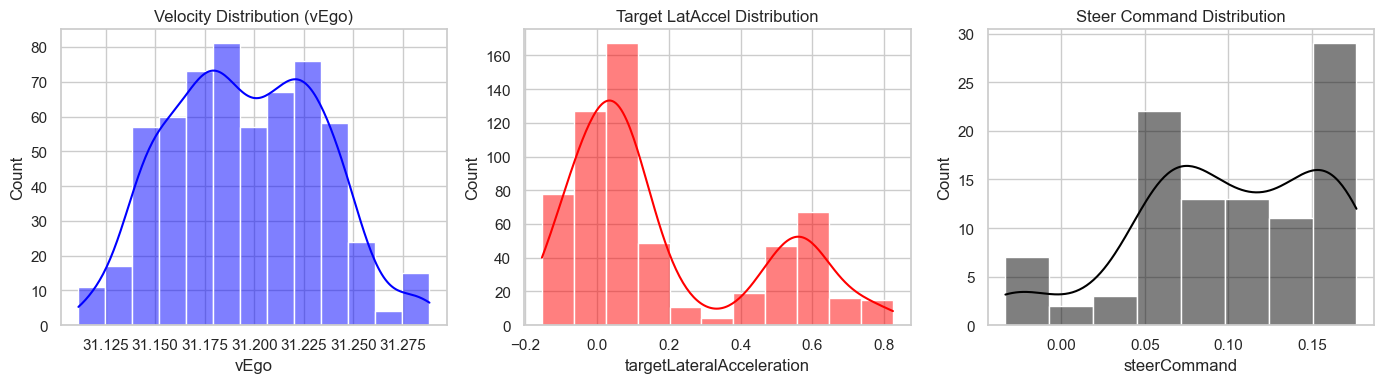

In [36]:
plot_data(os.path.join(DATA_FOLDER, FILES[2])) 

In [4]:
import os
import sys

# Get the current working directory
current_dir = os.getcwd()

# Get the parent directory
parent_dir = os.path.dirname(current_dir)

# Add the parent directory to sys.path
sys.path.append(parent_dir)

from simulator import TinyPhysicsEnv
env = TinyPhysicsEnv(data_dir='/mnt/ML_Codes/controls_challenge/data', model_path='/mnt/ML_Codes/controls_challenge/models/tinyphysics.onnx', context_length=20)
obs = env.reset()
done = False
reward = 0.0
while not done:
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    print(reward)


-0.24642195914634768
-0.6947419906835159
-0.8027600622513797
-36.266259857731576
-26.79992741677481
-26.32183360694531
-30.758230305640314
-61.69231524666638
-33.42957091550644
-29.991169278443195
-26.634661590952
-44.26408625241345
-81.91314170590296
-41.82852857698823
-82.00415293506623
-35.51326842921105
-25.100697274818508
-40.08588126053572
-84.46945871567772
-173.88344567795292
-275.5429466260848
-179.0901913721003
-133.91517866161436
-100.28005314367593
-45.465995488834864
-21.246547199092987
-25.600643352429813
-31.792249317455138
-59.353345730875795
-65.69208638467548
-52.91288978300687
-38.847478510364425
-25.005380876191783
-36.895423404441964
-71.74301615716425
-34.46267629044349
-25.065293699396026
-0.17673454441179687
-31.61432186363042
-61.7334567861717
-31.424582746038247
-26.23980657838504
-46.57150942706298
-92.24830940821246
-47.37202555978521
-26.44923173657447
-48.10887798943136
-95.86880809084468
-180.62004204182617
-131.8201404360533
-90.56537324725265
-130.30634